# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()

720

In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?

df.count().idxmin()

'Engine HP'

In [7]:
# * Print how long our dataframe is.

df.shape[0]

11194

In [8]:
# * Remove any row that has a null value in it. 

df = df.dropna()

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

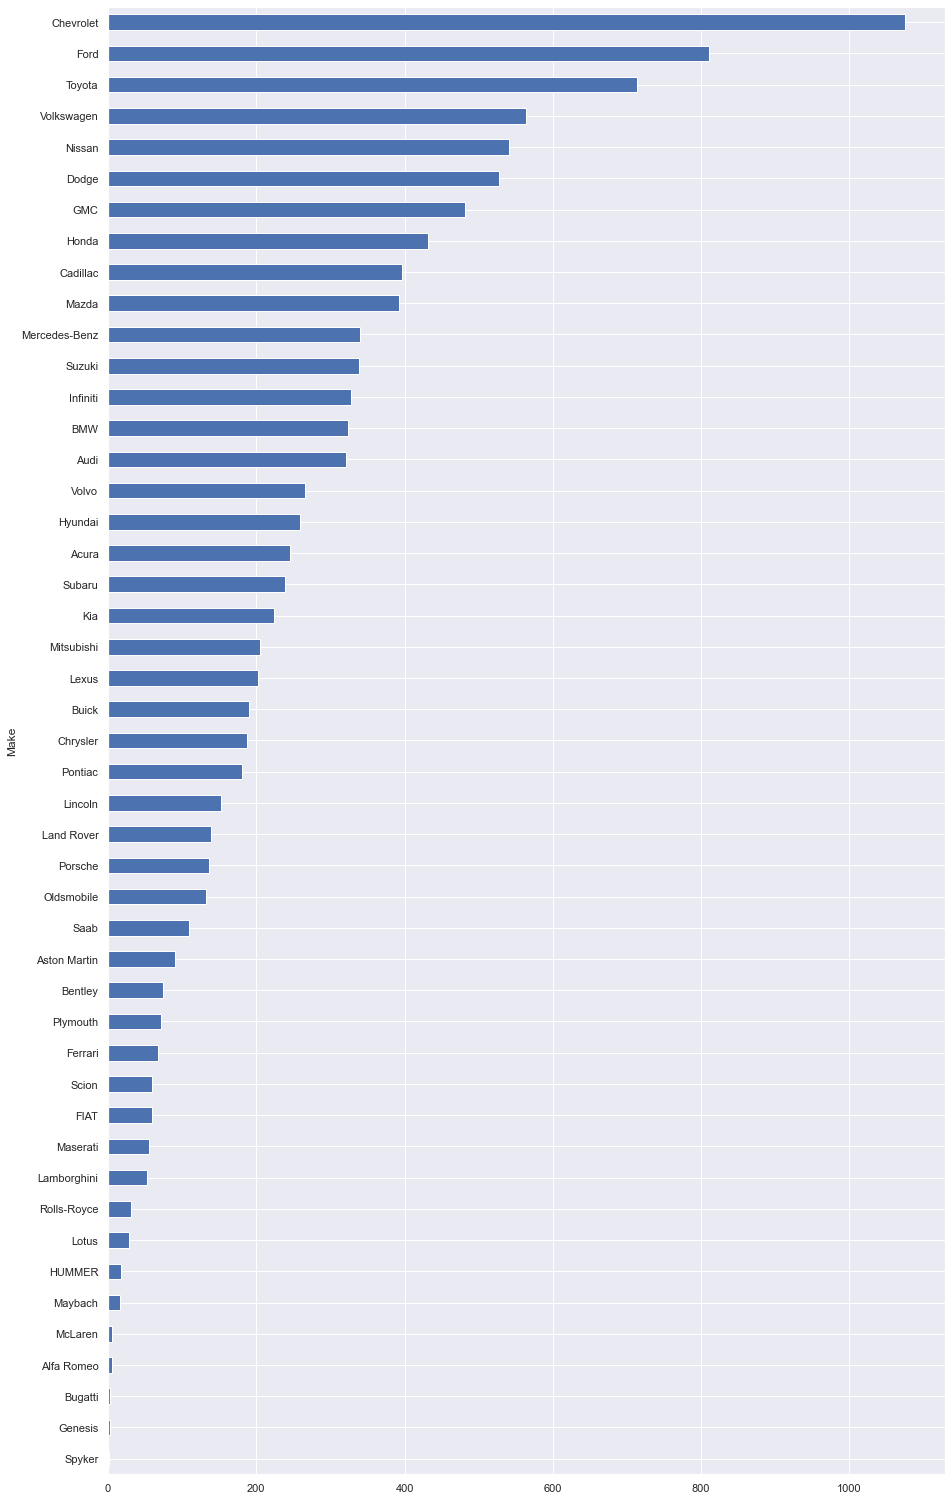

In [17]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

gb = df.groupby('Make')
car_count = gb["Make"].count().sort_values()
car_count.plot(kind='barh', figsize=(15, 27))

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

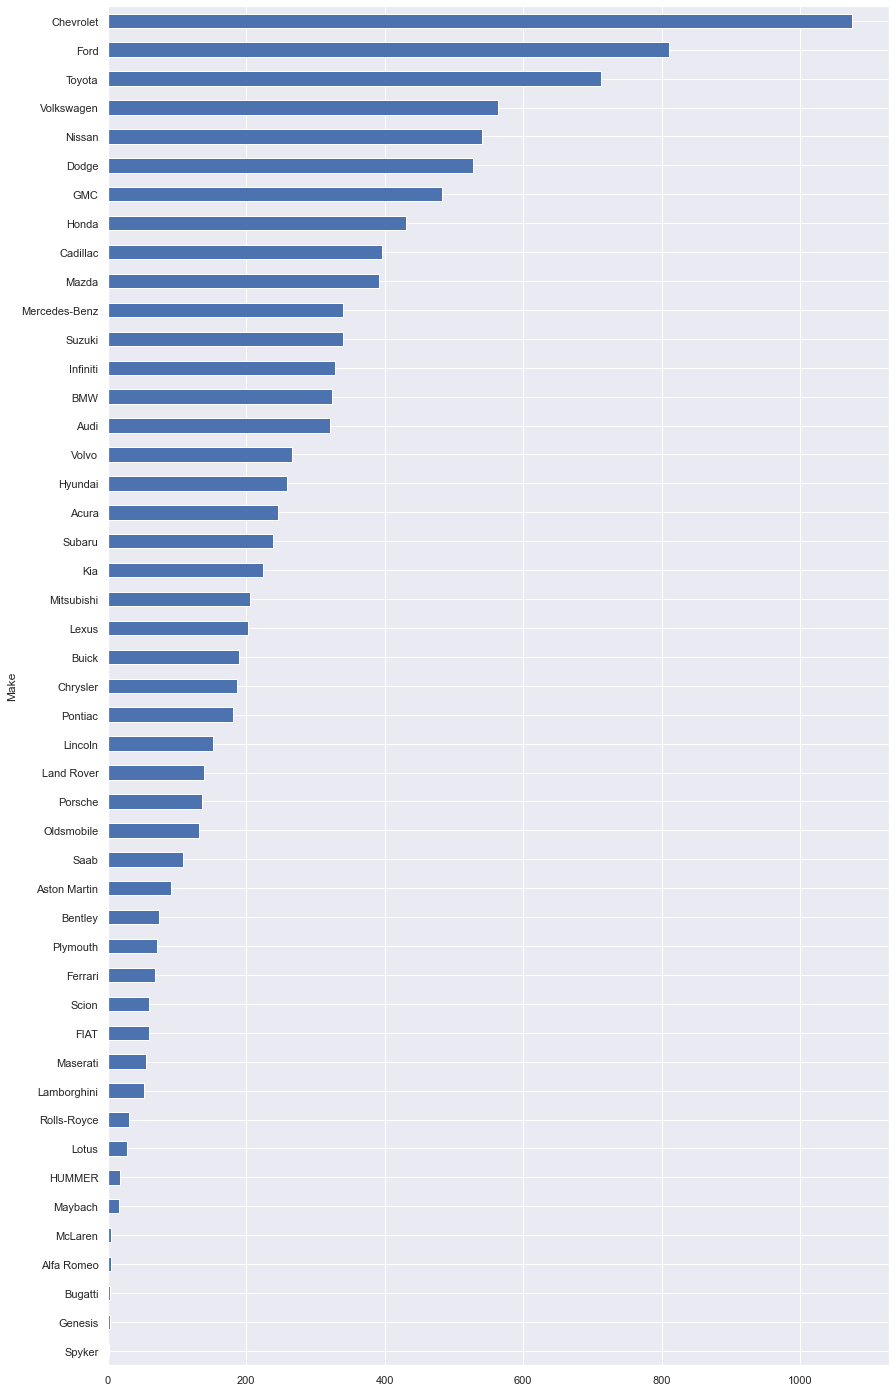

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

gb = df.groupby('Make')
car_count = gb["Make"].count().sort_values()
car_count.plot(kind='barh', figsize=(14,25))



# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


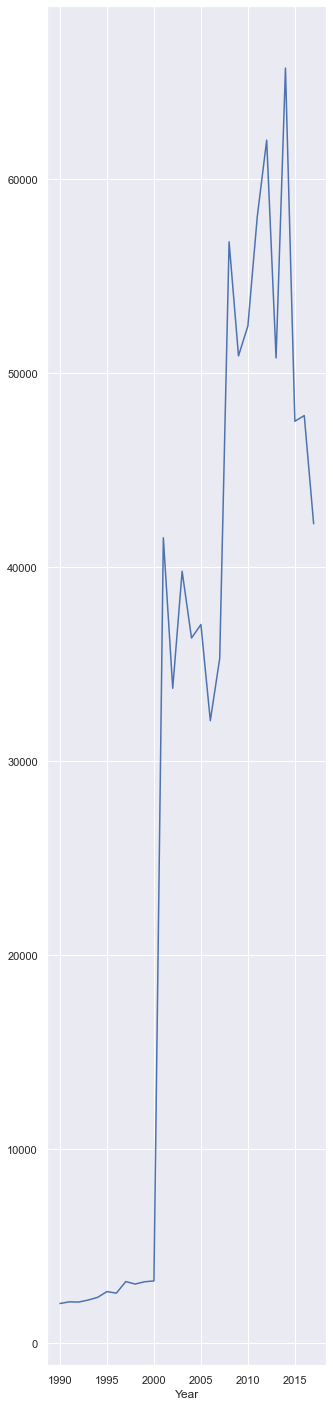

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
gb = df.groupby("Year")
average = gb["MSRP"].mean()
average.plot(kind= "line", figsize = (5,25))


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where is 10 when year is less than 2000, else 1.


# Multiply the MSRP by the price adjuster.
df["adjusted_price"] = np.where(df.Year < 2000, df.MSRP*10, df.MSRP)
df[df.Year < 2000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,Compact,2dr SUV,26,22,481,2000,20000
11482,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,rear wheel drive,2.0,Compact,2dr SUV,26,22,481,2000,20000
11792,Subaru,XT,1991,regular unleaded,97.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,29,22,640,2000,20000
11793,Subaru,XT,1991,regular unleaded,145.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,Coupe,26,18,640,2000,20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

AttributeError: 'Line2D' object has no property 'ylabel'

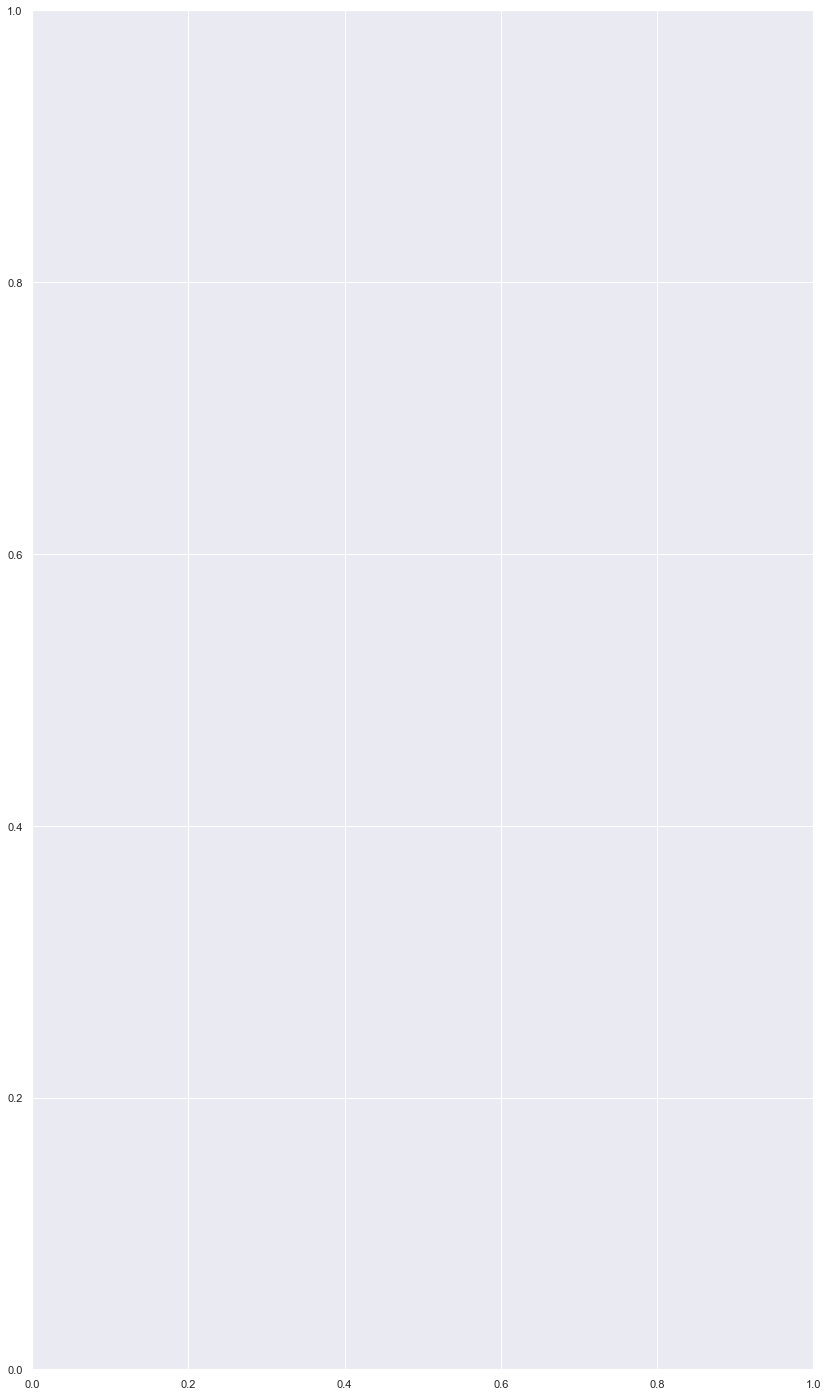

In [14]:
# Plot new prices

gb = df.groupby("Year")
average = gb["adjusted_price"].mean()
average.plot(kind="line", figsize=(14,25), ylabel="Adjusted Price", ylim=[0,100000])

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

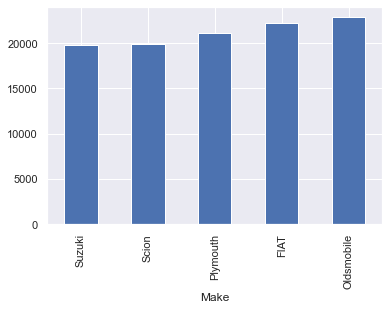

In [18]:
# What are the top 5 car makers make the most expensive cars on average. 
h = df.groupby("Make")["adjusted_price"].mean().sort_values().head()
h.plot(kind="bar")

# What are the 5 car makers that have the highest median highway MPG?

In [19]:
# Which car makers have the highest median highway MPG?

df.groupby("Make")[["highway MPG"]].median().head()

,highway MPG
Make,
Acura,28
Alfa Romeo,34
Aston Martin,19
Audi,28
BMW,28


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

In [20]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
car_list = ['Chevrolet', 'Ford', 'Toyota']
is_CFT = df["Make"].isin(car_list)
temp_df = df[is_CFT]
ax = sns.histplot(data = temp_df, 
                    x ="adjusted_price",hue="Make")
ax.set_title("Adjusted Price of Cheverolet, Ford, and Toyota")

AttributeError: module 'seaborn' has no attribute 'histplot'

# Remake the same histogram, but limit the x-axis from 0 to 100,000

In [21]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
car_list = ['Chevrolet', 'Ford', 'Toyota']
is_CFT = df["Make"].isin(car_list)
temp_df = df[is_CFT]
ax = sns.histplot(data = temp_df, 
                    x ="adjusted_price",hue="Make")
ax.set_title("Adjusted Price of Cheverolet, Ford, and Toyota")
ax.setxlim(0,100000)

AttributeError: module 'seaborn' has no attribute 'histplot'

# Plot the relationship between Engine HP and highway MPG

In [22]:
# Plot the relationship between Engine HP and highway MPG
sns.scatter_plot(data=df,x="Engine HP", y="highwayMPG")

AttributeError: module 'seaborn' has no attribute 'scatter_plot'

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

In [23]:
# create a boxplot for the 'Engine HP'
sns.box_plot(data=df["Engine HP"])

AttributeError: module 'seaborn' has no attribute 'box_plot'

# Make another boxplot for highway MPG

In [24]:
# create a boxplot for the 'highway MPG'
sns.box_plot(data=df["Highway MPG"])

AttributeError: module 'seaborn' has no attribute 'box_plot'

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [25]:
# Remove any  outliers from Engine HP and highway MPG 
q1 = df["Engine HP"].quantile(.25)
q3 = df["Engine HP"].quantile(.75)
iqr = q3-q1
out_bel = df["Engine HP"] < (q1 - 1.5*iqr)
out_abv = df["Engine HP"] > (q3 + 1.5*iqr)
df = df[~(out_abv | out_bel)]
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,50920


# Remake the boxplots for both Engine HP and highway MPG


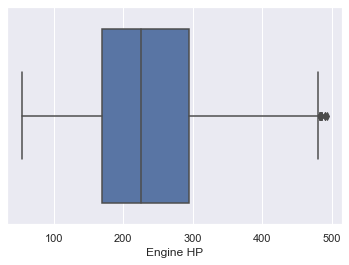

In [26]:
# Engine HP boxplot
ax = sns.boxplot(data=df, x="Engine HP")

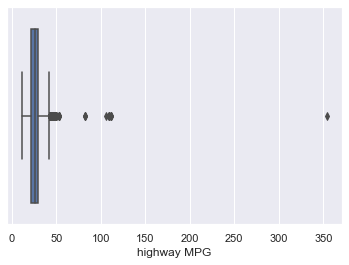

In [27]:
# highway MPG boxplot

ax = sns.boxplot(data=df, x="highway MPG")

# Make a scatter plot of Engine HP vs highway MPG

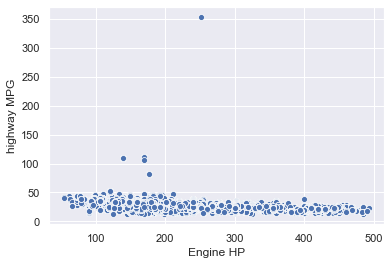

In [28]:
# Make a scatter plot of Engine HP vs highway MPG
sns.scatterplot(data=df, x="Engine HP", y="highway MPG")

# What does this plot tell you about how Engine HP affects highway MPG?

In [29]:
# What does this plot tell you about how Engine HP affects highway MPG?
df.corr()
print("The correlation is moderate negative")

The correlation is moderate negative


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

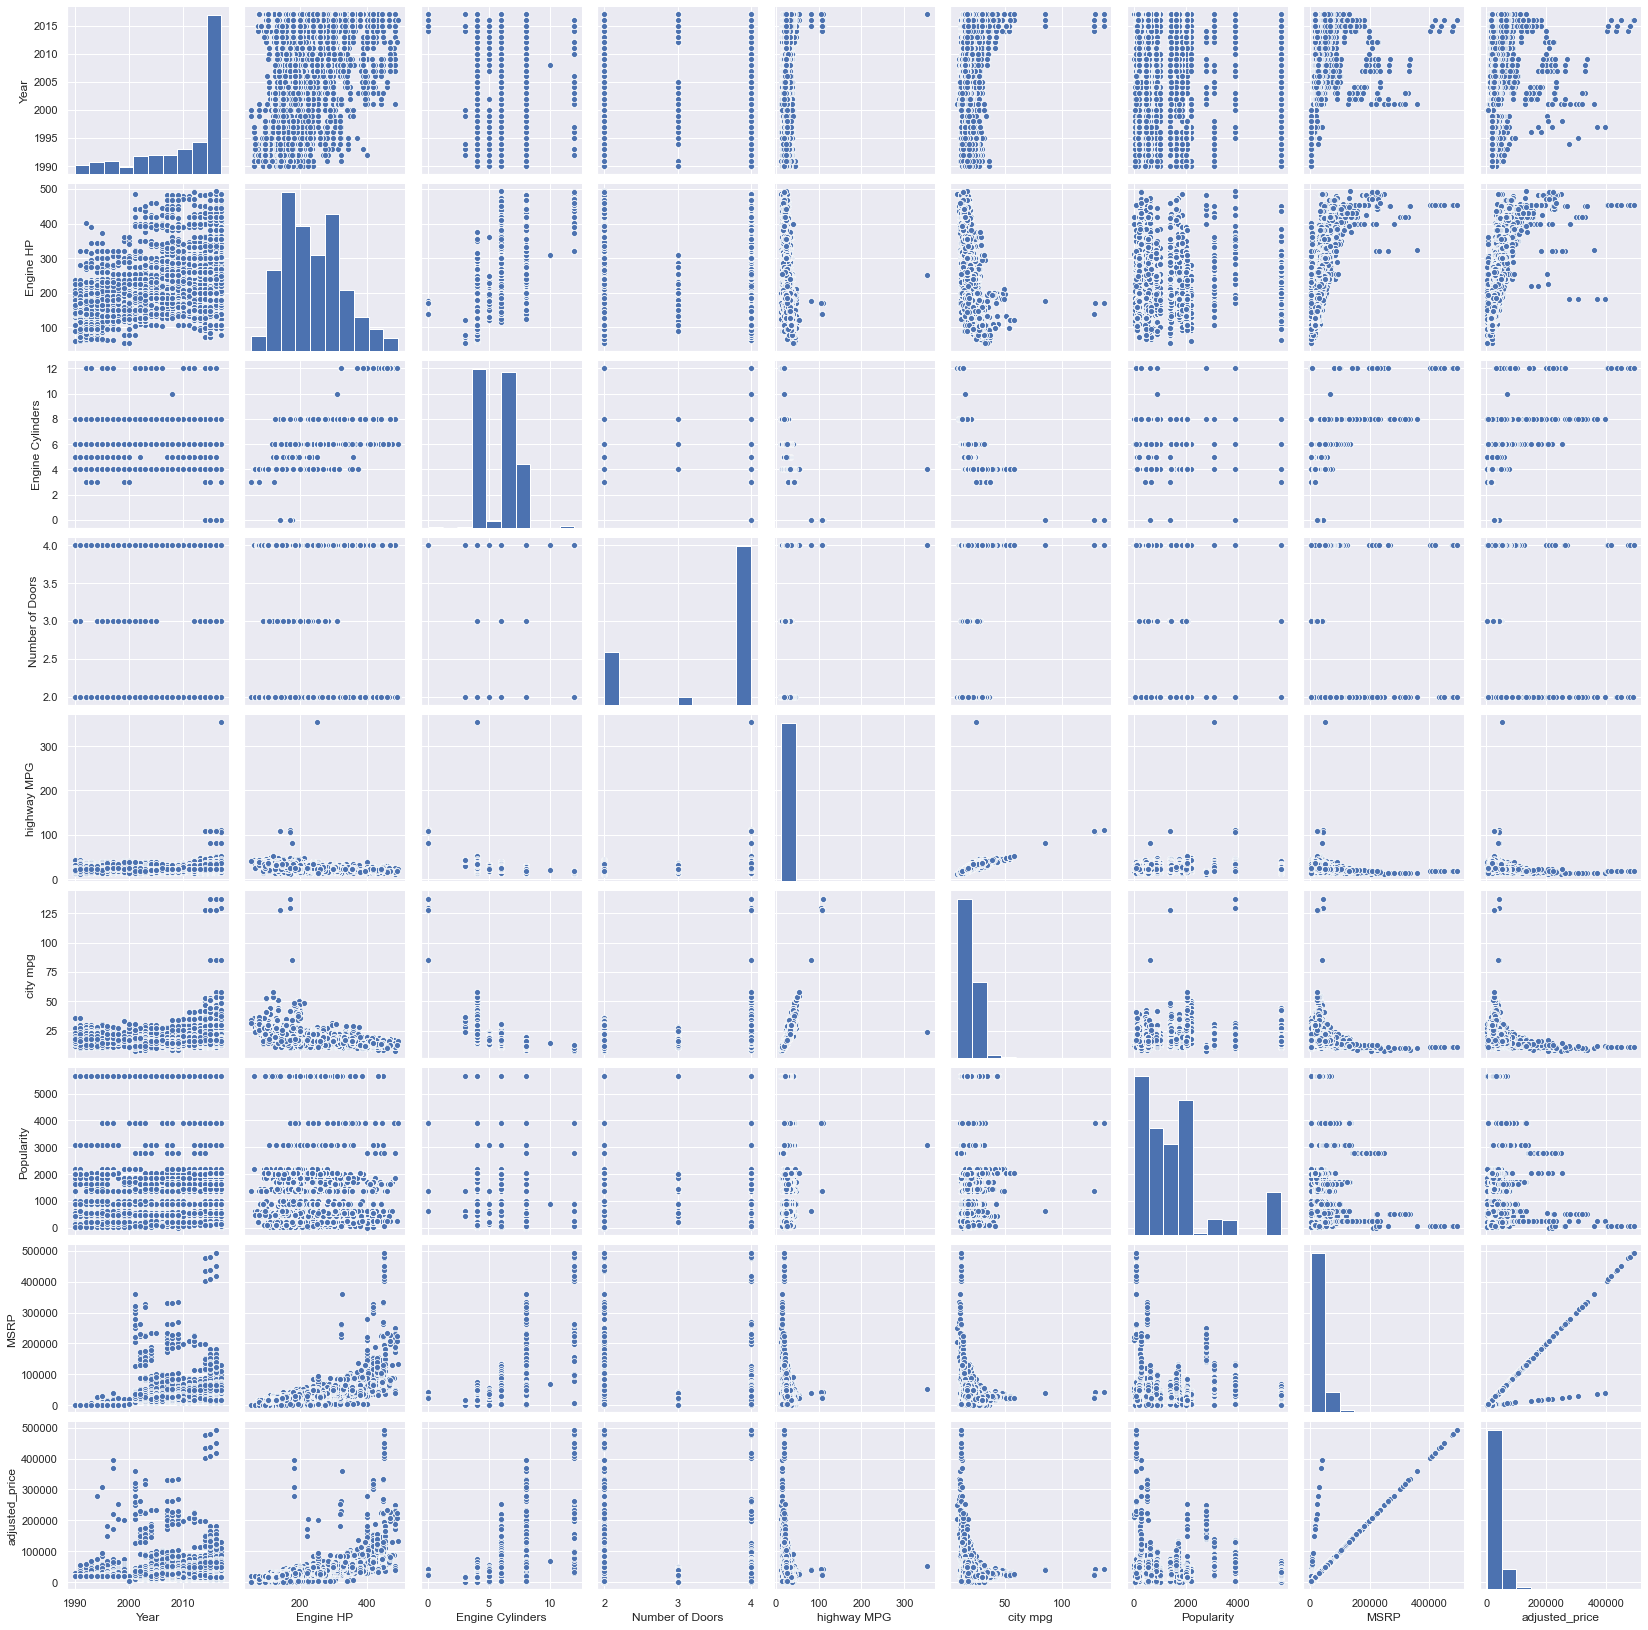

In [30]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df);

In [31]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print("Highway MPG and city MPG")

Highway MPG and city MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

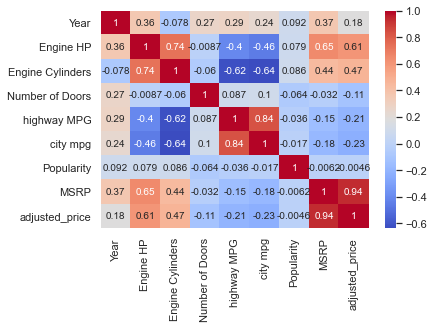

In [32]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8


sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [34]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine Cylinders, becuase more cylinders means you can produce more HP')

Engine Cylinders, becuase more cylinders means you can produce more HP


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [42]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'adjusted_price'],
      dtype='object')

In [43]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
